In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib
import numpy as np

for font in font_manager.findSystemFonts('/Users/leonardokuffo/Library/Fonts/'):
    font_manager.fontManager.addfont(font)

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
matplotlib.rc('font', family='Droid Serif') 

In [12]:
vertical_search_speed = {
    'contriever-768': 14.4215,
    'deep-image-96-angular': 4.65358,
    'fashion-mnist-784-euclidean': 2.39905,
    'mnist-784-euclidean': 2.38284,
    'gist-960-euclidean': 16.2808,
    'glove-200-angular': 8.40147,
    'glove-25-angular': 0.625378,
    'glove-50-angular': 1.12687,
    'msong-420': 9.23505,
    'nytimes-16-angular': 0.140941,
    'sift-128-euclidean': 1.75154,
    'stl-9216': 42.6616,
    'trevi-4096': 16.9664,
}
arch = 'ZEN4'

In [13]:
df_ads = pd.read_csv(f'../{arch}/IVF_PDX_ADSAMPLING_TUNING.csv')
df_ads['PRUNE Selection Percentage'] = round(df_ads['warmup_selectivity'] * 100, 2)
df_ads['PLATEAU Selection Percentage'] = df_ads['plateau_selectivity'] * 100

In [14]:
SPEEDUP = True

/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_18414/2536164882.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Speedup'] = df.apply(lambda x: vertical_search_speed.get(x.dataset, 1) / x.avg, axis=1)
/var/folders/g_/tfhsysh13vz_74rpmgswx9hc0000gn/T/ipykernel_18414/2536164882.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dataset'] = df['dataset'].apply(lambda x: DATASETS_MAPPING.get(x, 'dummy'))


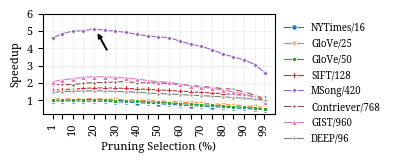

In [15]:
import seaborn as sns

DATASETS_MAPPING = {
    #'contriever-768': 'Contriever/768',
    'deep-image-96-angular': 'DEEP/96',
    #'fashion-mnist-784-euclidean': 'F-MNIST/784',
    #'mnist-784-euclidean': 'MNIST/784',
    'gist-960-euclidean': 'GIST/960',
    #'glove-200-angular': 'GloVe/200',
    #'glove-25-angular': 'GloVe/25',
    #'glove-50-angular': 'GloVe/50',
    'msong-420': 'MSong/420',
    'nytimes-16-angular': 'NYTimes/16',
    'sift-128-euclidean': 'SIFT/128',
    #'stl-9216': 'STL/9216',
    #'trevi-4096': 'Trevi/4096',
    'contriever-768': 'Contriever/768',
    # 'fashion-mnist-784-euclidean': 'F-MNIST/784',
    # 'mnist-784-euclidean': 'MNIST/784',
    'glove-25-angular': 'GloVe/25',
    'glove-50-angular': 'GloVe/50',
    'msong-420': 'MSong/420',
    'nytimes-16-angular': 'NYTimes/16',
}

df = df_ads[df_ads['PLATEAU Selection Percentage'] == 0.001]
df['Speedup'] = df.apply(lambda x: vertical_search_speed.get(x.dataset, 1) / x.avg, axis=1)
df['Dataset'] = df['dataset'].apply(lambda x: DATASETS_MAPPING.get(x, 'dummy'))
df = df[df['Dataset'] != 'dummy']
df = df[df['Speedup'] != -1]

DATASETS_FOR_PUB = {
    'msong-420': 'MSong/768',
    'deep-image-96-angular': 'DEEP/96',
    'gist-960-euclidean': 'GIST/960',
    'sift-128-euclidean': 'SIFT/128',
    'glove-200-angular': 'GloVe/200',
    'nytimes-16-angular': 'NYTimes/16',
    'contriever-768': 'Contriever/768',
    'fashion-mnist-784-euclidean': 'F-MNIST/784',
    'mnist-784-euclidean': 'MNIST/784',
    'glove-25-angular': 'GloVe/25',
    'glove-50-angular': 'GloVe/50',
    'msong-420': 'MSong/420',
    'nytimes-16-angular': 'NYTimes/16',
}

font = {'size': 8}
matplotlib.rc('font', **font)

fig, (
    (ax1)
) = plt.subplots(1, 1, constrained_layout=False)
fig.set_size_inches(3, 1.3)
plots = [ax1]

ax = plots[0]

sns.lineplot(
    data=df, 
    x='PRUNE Selection Percentage', 
    y='Speedup', 
    hue='Dataset',
    style='Dataset',
    linewidth=0.8,
    markersize=4,
    dashes=False,
    markers=True,
)


ax.set_yticks([1, 2, 3, 4, 5, 6])
ax.set_yticklabels(labels=['1', '2', '3', '4', '5', '6'])

ax.set_xticks([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 99])
ax.set_xticklabels(labels=[1, '', 10, '', 20, '', 30, '', 40, '', 50, '', 60, '', 70, '', 80, '', 90, '', 99], rotation=90)

ax.set_xlabel('Pruning Selection (%)')
#ax.set_ylim((0, 20))

ax.legend(
    loc="upper left",
    prop={'size': 7},
    ncols=1,
    frameon=False,
    bbox_to_anchor=(1, 1),
    markerscale=1,
)

ax.yaxis.grid(linewidth=0.5, color='#ededed')
ax.xaxis.grid(linewidth=0.5, color='#ededed')
ax.set_axisbelow(True)

ax.annotate(
    '', # El texto
    xy = (22, 4.8), # La ubicación del punto sobre el cual hare mi anotación (x, y). A este punto apuntara mi flecha
    xytext = (26, 3.9), # La ubicacion donde estara mi texto
    size=10, 
    color='grey',
    horizontalalignment='center',
    arrowprops={ 
        'width': 0.3,
        'color': 'black',
        'headwidth': 3,
        'headlength': 3
    }
)

plt.savefig(f'../figures/SELECTIVITY_{arch}.png', format='png', dpi=600, bbox_inches='tight')